### EQUIPO CSI (Cafelito, salarios e Insights)
#### PROYECTO: Talento bajo análisis

In [185]:
#Primero de todo vamos a importar librerias necesarias para aplicarlo a este proyecto
#Pandas tratamiento de DF
#matplotlib para visualizaciones 
#seaborn para visualizaciones más esteticas
#Numpy para estadistica y valores numericos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Habilita IterativeImputer
from sklearn.impute import IterativeImputer

df = pd.read_csv('hr_raw_data.csv',index_col=0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [186]:
#Primera función de análisis basico

def eda_(df):
    print("🔍 Primeras filas del DataFrame:")
    display(df.head(3))

    print("📐 Dimensiones:")
    print(df.shape , "\n")

    print("🧠 Información general:")
    display(df.info())

    print("📊 Tipos de datos por columna:")
    print(df.dtypes, "\n")

    print("📉 Descripción de columnas numéricas:")
    display(df.describe())

    print("🔤 Descripción de columnas categóricas:")
    display(df.describe(include=['O']))


    print("🚫 Valores nulos por columna:")
    display(df.isnull().sum())

    print("📎 Filas duplicadas:")
    dup_count = df.duplicated().sum()
    print(f"Duplicadas: {dup_count}")
    if dup_count > 0:
        print("Ejemplo de duplicados:")
        print(df[df.duplicated()].head(), "\n")
    else:
        print("No hay filas duplicadas.\n")

In [187]:
#Visualización datos nulos, tipos etc
eda_(df)

🔍 Primeras filas del DataFrame:


,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1


📐 Dimensiones:
(1678, 41) 

🧠 Información general:
<class 'pandas.core.frame.DataFrame'>
Index: 1678 entries, 0 to 1677
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1678 non-null   object 
 1   attrition                 1678 non-null   object 
 2   businesstravel            877 non-null    object 
 3   dailyrate                 1678 non-null   float64
 4   department                312 non-null    object 
 5   distancefromhome          1678 non-null   int64  
 6   education                 1678 non-null   int64  
 7   educationfield            904 non-null    object 
 8   employeecount             1678 non-null   int64  
 9   employeenumber            1678 non-null   int64  
 10  environmentsatisfaction   1678 non-null   int64  
 11  gender                    1678 non-null   int64  
 12  hourlyrate                411 non-null    float64
 13  jobinvolvement   

None

📊 Tipos de datos por columna:
age                          object
attrition                    object
businesstravel               object
dailyrate                   float64
department                   object
distancefromhome              int64
education                     int64
educationfield               object
employeecount                 int64
employeenumber                int64
environmentsatisfaction       int64
gender                        int64
hourlyrate                  float64
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome                object
monthlyrate                  object
numcompaniesworked            int64
over18                       object
overtime                     object
percentsalaryhike             int64
performancerating            object
relationshipsatisfaction      int64
standardhours                objec

,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,numcompaniesworked,percentsalaryhike,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,numberchildren
count,1678.000000,1678.000000,1678.000000,1678.0,1678.000000,1678.000000,1678.000000,411.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,0.0
mean,668.079714,4.504172,2.932658,1.0,809.859952,4.264005,0.398689,83.140768,2.740763,2.064362,2.743147,2.670441,15.154350,2.700238,0.787843,2.795590,7.124553,2.241955,4.200238,1986.047080,NaN
std,470.787298,14.652066,1.024270,0.0,467.084867,6.912695,0.489774,57.272101,0.710359,1.099425,1.105172,2.501133,3.649607,1.079494,0.843252,1.288657,6.173837,3.246554,3.554224,9.154908,NaN
min,104.103175,-49.000000,1.000000,1.0,1.000000,1.000000,0.000000,13.012897,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1963.000000,NaN
25%,290.035510,2.000000,2.000000,1.0,403.250000,2.000000,0.000000,36.254439,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,0.000000,2.000000,3.000000,0.000000,2.000000,1980.000000,NaN
50%,556.256661,5.000000,3.000000,1.0,813.500000,3.000000,0.000000,69.532083,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,1.000000,3.000000,5.000000,1.000000,3.000000,1987.000000,NaN
75%,971.956349,11.000000,4.000000,1.0,1215.750000,4.000000,1.000000,116.987103,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,1.000000,3.000000,9.000000,3.000000,7.000000,1993.000000,NaN
max,2063.388889,29.000000,5.000000,1.0,1614.000000,49.000000,1.000000,255.963294,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,3.000000,6.000000,40.000000,15.000000,17.000000,2005.000000,NaN


🔤 Descripción de columnas categóricas:


,age,attrition,businesstravel,department,educationfield,jobrole,maritalstatus,monthlyincome,monthlyrate,over18,overtime,performancerating,standardhours,totalworkingyears,worklifebalance,yearsincurrentrole,sameasmonthlyincome,salary,roledepartament,remotework
count,1678,1678,877,312,904,1678,1003,1189,1678,740,982,1478,1327,1129,1564,35,1189,1393,312,1678
unique,54,2,3,3,6,1579,5,493,673,1,2,2,2,40,4,10,493,583,301,5
top,35,No,travel_rarely,Research & Development,Life Sciences,mANager,Married,"2342,59$","11681,39$",Y,No,"3,0",Part Time,"10,0","3,0","2,0","2342,59$","53914,11$",Sales exECutIVE - Sales,1
freq,88,1406,616,203,367,5,419,228,326,740,714,1257,927,151,946,12,228,270,2,375


🚫 Valores nulos por columna:


age                            0
attrition                      0
businesstravel               801
dailyrate                      0
department                  1366
distancefromhome               0
education                      0
educationfield               774
employeecount                  0
employeenumber                 0
environmentsatisfaction        0
gender                         0
hourlyrate                  1267
jobinvolvement                 0
joblevel                       0
jobrole                        0
jobsatisfaction                0
maritalstatus                675
monthlyincome                489
monthlyrate                    0
numcompaniesworked             0
over18                       938
overtime                     696
percentsalaryhike              0
performancerating            200
relationshipsatisfaction       0
standardhours                351
stockoptionlevel               0
totalworkingyears            549
trainingtimeslastyear          0
worklifeba

📎 Filas duplicadas:
Duplicadas: 64
Ejemplo de duplicados:
     age attrition businesstravel    dailyrate         department  \
1614  35        No            NaN  1032.487286                NaN   
1615  59        No  travel_rarely   290.035510   Human Resources    
1616  30        No  travel_rarely  1032.487286                NaN   
1617  34       Yes  travel_rarely   556.256661                NaN   
1618  47        No            NaN   290.035510                NaN   

      distancefromhome  education educationfield  employeecount  \
1614                18          5  Life Sciences              1   
1615                 6          2        Medical              1   
1616                 5          3            NaN              1   
1617                24          4            NaN              1   
1618                 2          4  Life Sciences              1   

      employeenumber  environmentsatisfaction  gender  hourlyrate  \
1614             178                        2       0  

# employeenumber
- Es considerad el campo unico, no debería repetirse
- Primero, elimino los duplucados antes de empezar a aplicar el tratamiento

In [188]:
#
df[df['employeenumber'].duplicated(keep=False)]
df = df.drop_duplicates(subset="employeenumber", keep="first")

In [189]:
#El campo edad tiene valores mmal puestos, por ellos sustituimos esa columa por datebirth y ya se convierte a int
df['age'] = 2025- df['datebirth']
# cargarme df['datebirth'] 



In [190]:
#Columa businesstravel
#Tenemos 3 categorías (viaja_raramente/ viaja_frecuentemente/no viaja)
#Columna de tipo Object Ok
#Alto valor de nulos 
#Aplicamos categoria Unknown

print(df['businesstravel'].value_counts(dropna=False, normalize=True).reset_index())
print(f'El valor de nulos total es {df['businesstravel'].isnull().sum()}')

#Check del porcentaje de cuantas columnas son nulas

df['businesstravel'].value_counts(dropna=False, normalize=True) * 100

#Vamos a imputar distribución no dominante 

df['businesstravel'] = df['businesstravel'].fillna('Unknown')


      businesstravel  proportion
0                NaN    0.478315
1      travel_rarely    0.363073
2  travel_frequently    0.102230
3         non-travel    0.056382
El valor de nulos total es 772


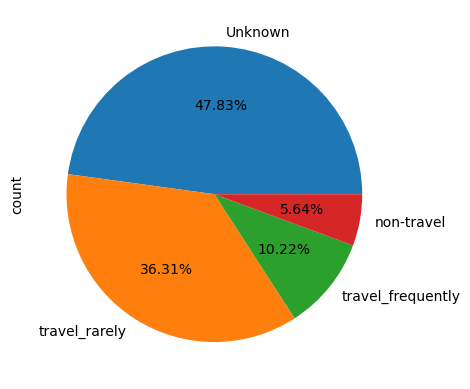

In [191]:
df['businesstravel'].value_counts().plot.pie(autopct="%1.2f%%")  
plt.show()

In [192]:
#Columna dailyrate: Tarifa diaria estimada para clientes, calculada en base al salario.
# float ok
# Ningún nulo
#redoondear 

df['dailyrate'] = df['dailyrate'].round(2)

In [193]:
# Departamento
#Tipo Object
#El porcentaje de nulos es elevadisimo
#No será muy relevante

print(df['department'].value_counts(dropna=False, normalize=True) * 100)

#Mejor borrar

df = df.drop('department', axis=1)

department
NaN                         81.288724
 Research & Development     12.143742
 Sales                       5.638166
 Human Resources             0.929368
Name: proportion, dtype: float64


In [194]:
#Vale ahi hay muchos datos en negativo
#no me sirve el replace
#voy a crear una mascara para tratar negativos
df['distancefromhome'].describe().T
df.loc[df['distancefromhome'] < 0, 'distancefromhome'] = 0

In [195]:
#Valores del 1-5 Nivel educativo del empleado en escala numérica. 1 poco - 5 max
#Es tipo int ok
#No hay ningún null
#Interesante 

df['education'].isnull().sum()
df['education'].value_counts().sort_values(ascending=True)
df['education'].describe()

count    1614.000000
mean        2.925031
std         1.022357
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: education, dtype: float64

In [196]:
# Columa: educationfield
# Campo de estudio académico del empleado.
# Tipo object
#774 nulos, menos de la mitad
#Voy a aplicar la moda para gestionar los nulos
# Life Sciences

df['educationfield'].mode()[0]
#Para rellenar con la moda :
df['educationfield']= df['educationfield'].fillna(df['educationfield'].mode()[0])
print(df['educationfield'].value_counts())

educationfield
Life Sciences       1094
Medical              276
Marketing            104
Technical Degree      69
Other                 59
Human Resources       12
Name: count, dtype: int64


In [197]:
#No se para que sirve exactamente
#Solo es una columna de 1
# No sirve para ID 
df = df.drop('employeecount', axis=1)
#df['employeecount']

In [198]:
#Este es el ID de empleados
#HAY 64 duplicados
#Es int
#Habría que ver si los que se repiten son attrition

#check funcion para comprobar nulos 
duplicados_no=0
duplicados_yes=0
df['employeenumber'].duplicated().sum()
duplicados = df[df['employeenumber'].duplicated(keep=False)]
# Duplicados de los que se fueron
duplicados_yes = duplicados[duplicados['attrition'] == 'Yes']
# Duplicados de los que siguen
duplicados_no = duplicados[duplicados['attrition'] == 'No']
print("Duplicados que se fueron:", len(duplicados_yes))
print("Duplicados que siguen:", len(duplicados_no))


Duplicados que se fueron: 0
Duplicados que siguen: 0


In [199]:
df['employeenumber'].duplicated().sum()
#df[df['employeenumber'].duplicated(keep=False)]

np.int64(0)

## 11-20

In [200]:
#  EnvironmentSatisfaction
#• Verificar que los valores estén en el rango 1–4.
#• Corregir valores fuera de rango (ejemplo: 49).
#• Confirmar tipo int64.
#• Revisar duplicados (ok si se repiten)

df["environmentsatisfaction"] = df["environmentsatisfaction"].astype(str).str[0].astype(int)

In [201]:
encuesta = df["environmentsatisfaction"].value_counts().sort_values(ascending=True)

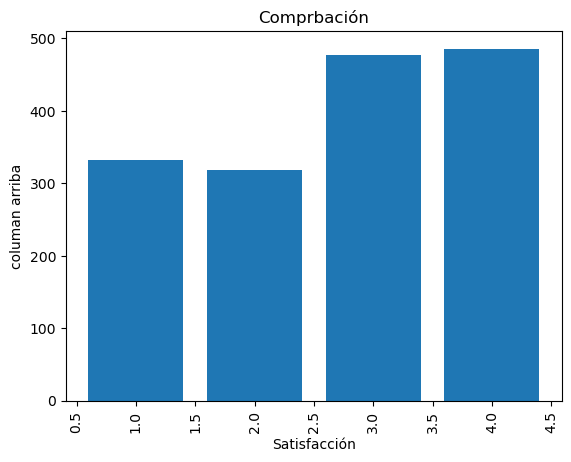

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(x=encuesta.index, height=encuesta.values)
plt.xlabel('Satisfacción')
plt.ylabel('columan arriba')
plt.title('Comprbación')
plt.xticks(rotation=90);

# Mostrar el gráfico
#investigar lo X

plt.show()

### Gender
- Normalizar categorías a M/F.
- Homogeneizar valores (ejemplo: 0/1 → Male/Female).
- No hay nulos

In [203]:
df["gender"] = df["gender"].astype(str).str.strip()
gen = {'0': "M", '1': "F"}
de = df['gender'].map(gen)


# HourlyRate
- • Revisar proporción de nulos.
- • Determinar redundancia frente a Salary y MonthlyIncome.
- • Eliminar columna (drop) si se confirma irrelevancia

In [204]:
# df["hourlyrate"].isnull().sum()
df.drop("hourlyrate", axis=1, inplace=True)

# JobInvolvement
- • Revisar que los valores estén en el rango 1–4.
- • Confirmar tipo int64. ok
- • Revisar duplicados (ok si se repiten).
 

In [205]:
implicacion = df["jobinvolvement"].value_counts().sort_values(ascending=False)

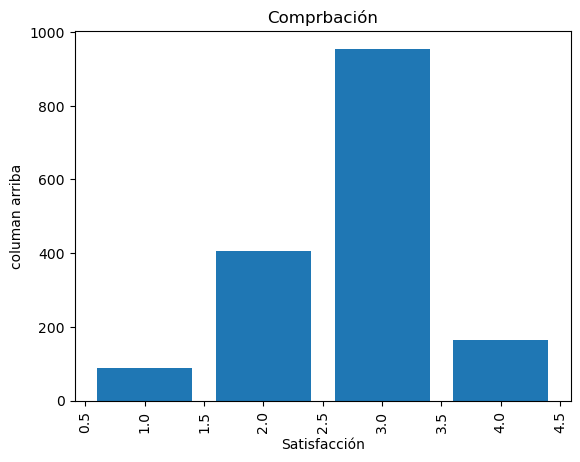

In [206]:
plt.bar(x=implicacion.index, height=implicacion.values)
plt.xlabel('Satisfacción')
plt.ylabel('columan arriba')
plt.title('Comprbación')
plt.xticks(rotation=90);


# JobLevel
- Revisar que los valores estén en el rango 1–5.
- Confirmar tipo int64.
- Revisar duplicados (ok si se repiten)
- No hay ningún nulo (perfecto)

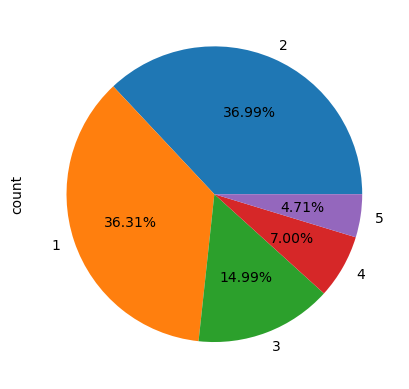

In [207]:
df["joblevel"].value_counts().plot.pie(autopct="%1.2f%%")  
plt.show()
# 1 - Junio
# 2- Puesto intermedio
# 3- senior especialista
# 4- jefes o gerente
# 5 - alta dirección

# JobRole
- Normalizar texto con .str.strip() y .str.lower().
- Unificar roles mal escritos o con mayúsculas/minúsculas distintas.
- NO hay nulos

In [208]:
df["jobrole"] = df["jobrole"].astype(str).str.strip().str.lower()

<Axes: ylabel='count'>

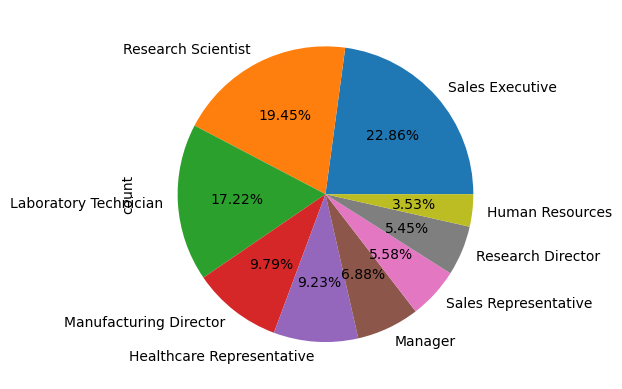

In [209]:
df["jobrole"] = df["jobrole"].str.title()
df["jobrole"].value_counts().plot.pie(autopct="%1.2f%%")  

#Lo cruzaría con atrittion de donde se va la gente

# JobSatisfaction
- Revisar que los valores estén en el rango 1–4. Ok
- Confirmar tipo int64. Ok
- Revisar duplicados (ok si se repiten).
- NO hay nulos

<Axes: ylabel='count'>

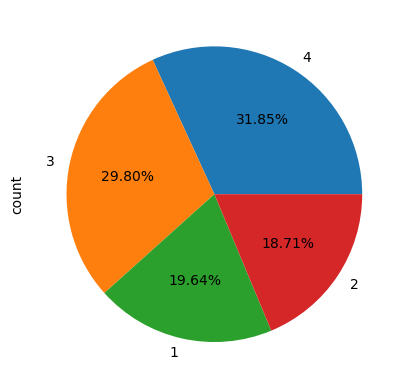

In [210]:
df["jobsatisfaction"].value_counts()
df["jobsatisfaction"].value_counts().plot.pie(autopct="%1.2f%%")  
#Attrtion - cruce


# MaritalStatus
- Revisar ~600 nulos, 1003 válidos.
- Normalizar texto con .str.title().
- Alto % de nulos : nueva categoria: Unknown'

escarte rellenar con la moda porque los nulos eran mayoria y variarían el analisis muchisimo.
he decidido conservar la columna porque da contexto social pero relleno lo nulos con unknown y hago una columna a parte.
rellenar con "Unknown" + columna bandera (*_missing)

#Conservas la señal de los nulos (que a veces es muy informativa).
si resulta que los que no dieron su estado civil tienen mayor tasa de abandono, esa bandera te lo mostrará.
Es lo más usado en modelos predictivos (machine learning) porque mejora la información sin perder registros.

In [211]:
df["maritalstatus"] = df["maritalstatus"].replace("Marreid", "married")
df["maritalstatus"] = df["maritalstatus"].replace("married", "Married")
df["maritalstatus"] = df["maritalstatus"].replace(np.nan, "Unknown") #Habia varios tipos de nulos y tuve que eliminarlo de estas dos formas.
df["maritalstatus"] = df["maritalstatus"].replace("nan", "Unknown")
df["maritalstatus"] = df["maritalstatus"].str.title()

In [212]:
df["maritalstatus"].unique()

array(['Unknown', 'Married', 'Divorced', 'Single'], dtype=object)

# MonthlyIncome
- Limpiar símbolos y comas, convertir a float ---> OK
- Confirmar ausencia de nulos tras limpieza.
- Rellenar nulos con media/mediana o estimación (Salary ÷ 12).
- Revisar outliers (valores anómalos)
- monthlyincome es la variable más clara; monthlyrate suele ser redundante.
Si haces un modelo predictivo para predecir si alguien se va de la empresa
lo normal es descartar monthlyrate y quedarte con monthlyincome para evitar duplicar información.

In [213]:
#Primero cambiar el $, despues , por .
df['monthlyincome'] = df['monthlyincome'].astype(str).str.replace("$", "")
df["monthlyincome"] = df["monthlyincome"].astype(str).str.replace(",", ".").astype(float)
df['monthlyincome'] = df['monthlyincome'].astype(float)

In [214]:
df['monthlyincome'].isnull().sum()

np.int64(468)

In [215]:
# Bruto mensual 
# df = df.drop(columns=["monthlyincome"])
df.drop("monthlyrate", axis=1, inplace=True)


# 21-30

In [216]:
## columna 21
df.rename(columns = {'numcompaniesworked':'numero_empresas_anteriores'}, inplace =True)

In [217]:

df['numero_empresas_anteriores'].value_counts()
df['joblevel'].value_counts()

joblevel
2    597
1    586
3    242
4    113
5     76
Name: count, dtype: int64

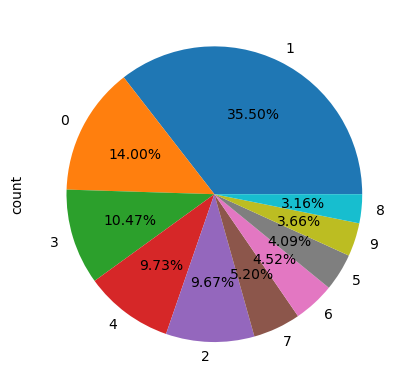

In [218]:
df['numero_empresas_anteriores'].value_counts().plot.pie(autopct="%1.2f%%")  
plt.show();

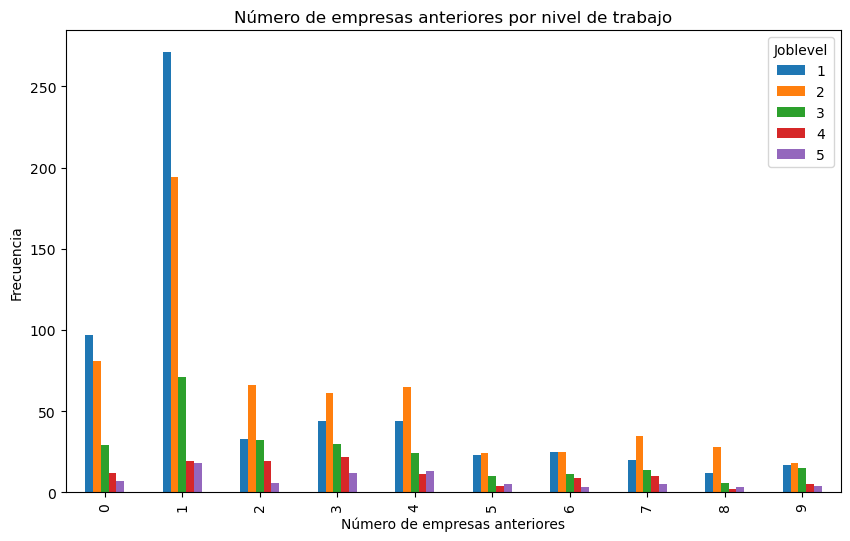

In [219]:
conteo = df.groupby('joblevel')['numero_empresas_anteriores'].value_counts().unstack(fill_value=0)

conteo.T.plot(kind='bar', figsize=(10,6))
plt.title('Número de empresas anteriores por nivel de trabajo')
plt.xlabel('Número de empresas anteriores')
plt.ylabel('Frecuencia')
plt.legend(title='Joblevel')
plt.show()

In [220]:
## columna 22
df.drop('over18', axis=1, inplace=True)

In [221]:
## columna 23
df.rename(columns = {'overtime': 'horas_extra'}, inplace =True)

In [222]:
#Elimnar 41% nulos------pasados a la categoria 'unknow'
nulos = (df['horas_extra'].isnull().sum()/df.shape[0]*100).round(2)

In [223]:
df['horas_extra'] = df['horas_extra'].fillna('Unknown')# si despues hacemos unique tiene que aparecer la nueva columna unknown

In [224]:
df['horas_extra'].unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

In [225]:
df['horas_extra'] = df['horas_extra'].astype(bool) #pasamos el dato a boleano

In [226]:
## columna 24
df.rename(columns = {'percentsalaryhike':'incremento_salario'}, inplace =True)

In [227]:
df['incremento_salario'].value_counts()
#Salario anual cruzar**
#attrition
#puro show

incremento_salario
11    232
13    230
12    225
14    220
15    110
18     98
17     88
16     86
19     82
20     60
22     59
21     51
23     29
24     25
25     19
Name: count, dtype: int64

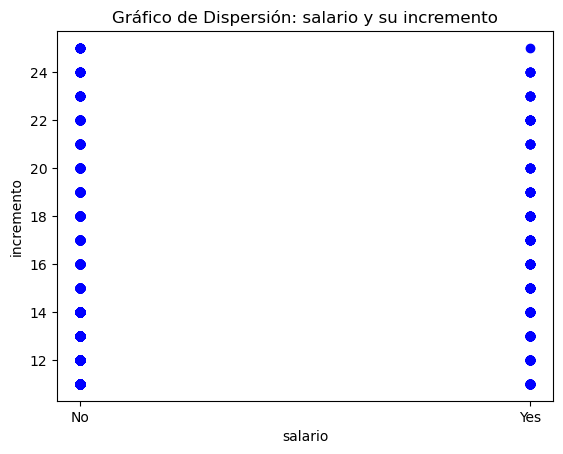

In [228]:
### chicas esto veo que no sirve para nada, la columna attrition solo tiene si o no , no nos sirve, seria mejor compararla con la monthlyincome o sacar del año el salariio mensual
# pero hemos eliminado esa columna, tenemos que darle otra vuelta
salario = df['attrition']
incremento = df['incremento_salario']
plt.scatter(salario, incremento, color="blue")
plt.title('Gráfico de Dispersión: salario y su incremento')
plt.xlabel('salario')
plt.ylabel('incremento')
plt.show()

In [229]:
## columna 25
df.rename(columns = {'performancerating':'nivel_trabajo'}, inplace =True)

In [230]:
#pasamos el dato a int64 para no tener problemas con los nulos
df['nivel_trabajo']= df['nivel_trabajo'].astype(str).str.replace(',', '.', regex = False)

In [231]:
df['nivel_trabajo'] = pd.to_numeric(df['nivel_trabajo'], errors='coerce')

In [232]:
df['nivel_trabajo']= df['nivel_trabajo'].astype('Int64')

In [233]:
# bajo % nulos, y categoria dominante 3, imputamos por la moda
df['nivel_trabajo'] = df['nivel_trabajo'].fillna(df['nivel_trabajo'].mode()[0]) 

In [234]:
##columna 26
df.rename(columns = {'relationshipsatisfaction':'satisfaccion_relaciones_interpersonales'}, inplace =True)

C:\Users\ganto\AppData\Local\Temp\ipykernel_48860\2559798007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='satisfaccion_relaciones_interpersonales', order=df['satisfaccion_relaciones_interpersonales'].value_counts().index, palette='pastel')


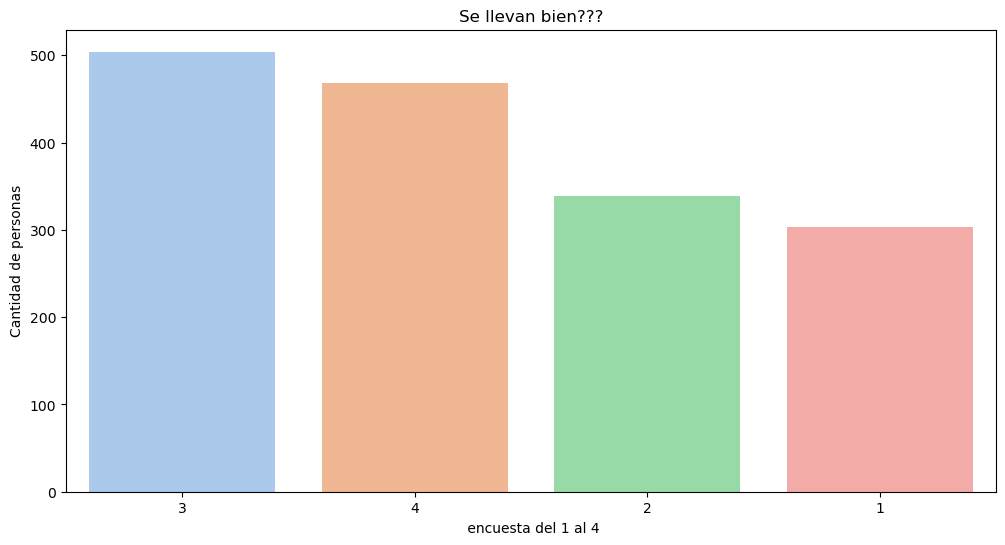

In [235]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='satisfaccion_relaciones_interpersonales', order=df['satisfaccion_relaciones_interpersonales'].value_counts().index, palette='pastel')
plt.title('Se llevan bien???')
plt.xlabel(' encuesta del 1 al 4')
plt.ylabel('Cantidad de personas')
plt.show();


#seguiremos informando
#ordenar grafica
#comparar cpn jobenviorenment

In [236]:
##columna 27
df.rename(columns = {'standardhours':'clasificacion_jornada'}, inplace =True)

In [237]:
#como son muchos nulos, creamos una nueva categoria
df['clasificacion_jornada'] = df['clasificacion_jornada'].fillna('Unknown')# si despues hacemos unique tiene que aparecer la nueva columna unknown

In [238]:
df['clasificacion_jornada'].unique()

array(['Full Time', 'Unknown', 'Part Time'], dtype=object)

In [239]:
#columna28
df.rename(columns = {'stockoptionlevel':'acciones_asignadas'}, inplace= True)

In [240]:
#finalmente,vemos que la columna no aporta info util y la borramos
df.drop('acciones_asignadas', axis=1, inplace=True)

In [241]:
##columna 29
df.rename(columns = {'totalworkingyears':'años_experiencia'}, inplace =True)

In [242]:
#pasamos el dato a int64 para no tener problema con los nulos
df['años_experiencia']= df['años_experiencia'].astype(str).str.replace(',', '.', regex = False)

In [243]:
df['años_experiencia'] = pd.to_numeric(df['años_experiencia'], errors='coerce')

In [244]:
df['años_experiencia']= df['años_experiencia'].astype('Int64')

In [245]:
#IterativeImputer
#imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)

In [246]:
imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df['años_experiencia'] = imputer_iter.fit_transform(df[['años_experiencia']])

In [247]:
##columna 30
df.rename(columns = {'trainingtimeslastyear':'cursos'}, inplace =True)

##  31-41

# worklifebalance   
- Encuesta sobre satisfacción (valores de 1-4)
- aprox nulos       
- Tipo eobject -> a = mal, 2: Medio, 3: Alto, 4: Muy alto

In [248]:
df['worklifebalance'] = df['worklifebalance'].str.replace(',0','')
dic = {'1':'Mal', '2':'Medio', '3':'Alto', '4':'Muy alto'}
df['worklifebalance'] = df['worklifebalance'].map(dic).fillna("Unknown")

#Ojo, si lo ejecutas mas de una vez da falloooo


In [249]:
df['worklifebalance'].value_counts(dropna=False, normalize=True)

worklifebalance
Alto        0.565675
Medio       0.222429
Muy alto    0.096035
Unknown     0.066914
Mal         0.048947
Name: proportion, dtype: float64

# yearsatcompany
- Se deja como está

In [250]:
#No hay ningún dato nulo
#Es tipo int ok
df['yearsatcompany'].value_counts()

yearsatcompany
5     208
1     171
2     141
3     141
10    133
7     115
4     114
8     106
9      94
6      78
0      44
11     36
20     29
13     26
15     21
14     19
22     17
18     15
12     15
21     14
16     14
19     12
17      9
24      7
33      5
25      5
26      4
31      3
32      3
27      3
36      3
23      2
40      2
29      2
37      1
30      1
34      1
Name: count, dtype: int64

# yearsincurrentrole
- Todo  nulos
- Eliminar

In [251]:
print(f'El total de nulos es: {df['yearsincurrentrole'].isnull().sum()}')
df = df.drop('yearsincurrentrole', axis = 1)

El total de nulos es: 1580


# yearssincelastpromotion
- Np hay nulos
- Interesante

In [252]:
df['yearssincelastpromotion']

0       15
1       11
2       11
3        5
4        2
5        4
6        7
7       11
8       11
9        0
10       5
11      15
12       1
13      15
14       2
15       1
16      13
17      15
18       1
19      14
20      14
21       8
22      12
23       3
24       4
25       5
26       6
27       5
28       5
29       0
30      13
31      12
32       4
33       2
34       2
35      15
36       1
37      10
38      13
39       1
40       6
41       2
42      15
43      15
44       1
45       5
46      12
47       4
48       5
49      11
50       5
51       5
52       6
53       6
54       1
55      11
56       1
57       5
58       5
59       2
60       3
61      10
62      11
63       4
64       1
65       4
66      11
67      13
68      11
69       4
70       2
71       1
72       2
73       2
74       2
75      14
76       0
77       6
78      10
79       1
80       5
81      15
82       5
83       4
84       4
85       0
86       3
87       2
88       3
89       3
90      15

# yearswithcurrmanager
- Años con el mismo manager
- No hay nulos
- Se admite duplicados

In [253]:
df.groupby('yearswithcurrmanager')['employeenumber'].count().reset_index()

,yearswithcurrmanager,employeenumber
0,0,270
1,1,84
2,2,380
3,3,148
4,4,104
5,5,36
6,6,30
7,7,267
8,8,115
9,9,70


# numberchildren
- Campo eliminado

In [254]:
df = df.drop('numberchildren', axis=1)

# roledepartament
- Columa eliminada

In [255]:
df = df.drop('roledepartament', axis=1)

# salary
- Elimnado el $ y convertido a float
- Hay pocos nulos, voy a darle un imputer

In [256]:
df['salary'] = df['salary'].str.replace('$', '')
df['salary'] = df['salary'].str.replace(',', '.').astype(float)

In [257]:
imputer_salary = IterativeImputer(max_iter = 100, random_state = 42)
df['salary'] = imputer_salary.fit_transform(df[['salary']]).round(2)

In [ ]:
#remote 
#Pide YES o NO

df['remotework'].value_counts()
dic_yes = {'1':'Yes','True':'Yes','False':'No','0':'No','Yes':'Yes'}
df['remotework'] = df['remotework'].map(dic_yes)

In [259]:
df.sample(10)

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,numero_empresas_anteriores,horas_extra,incremento_salario,nivel_trabajo,satisfaccion_relaciones_interpersonales,clasificacion_jornada,años_experiencia,cursos,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,remotework
926,25,No,travel_rarely,290.04,4,3,Life Sciences,927,1,0,4,1,Research Scientist,1,Unknown,2342.59,2,True,16,3,1,Part Time,5.000000,3,Muy alto,3,0,2,"2342,59$",2000,28111.13,No
434,50,No,Unknown,664.34,16,4,Life Sciences,435,3,1,3,2,Sales Executive,3,Divorced,NaN,8,True,14,3,3,Full Time,18.000000,2,Unknown,8,7,7,NaN,1975,64390.00,Yes
123,33,No,Unknown,1032.49,7,4,Medical,124,3,1,3,3,Manufacturing Director,4,Unknown,8339.32,1,True,14,3,3,Part Time,11.000000,2,Medio,11,4,10,"8339,32$",1992,100071.84,No
673,26,No,Unknown,286.21,18,1,Life Sciences,674,2,0,3,1,Laboratory Technician,3,Married,2311.67,0,True,12,3,3,Part Time,11.318934,2,Alto,5,1,2,"2311,67$",1999,27740.00,Yes
1040,43,No,Unknown,564.06,22,3,Life Sciences,1041,4,1,3,2,Research Scientist,4,Unknown,4555.83,3,True,14,3,1,Full Time,12.000000,4,Medio,6,3,3,"4555,83$",1982,54670.00,No
261,49,No,Unknown,1032.49,1,1,Life Sciences,262,3,1,3,3,Research Director,2,Married,8339.32,0,True,18,3,1,Part Time,14.000000,3,Mal,13,5,12,"8339,32$",1976,100071.84,Yes
552,49,No,travel_rarely,352.86,1,3,Life Sciences,553,1,0,3,1,Research Scientist,4,Unknown,2850.00,7,True,12,3,3,Full Time,17.000000,2,Medio,6,1,2,"2850,00$",1976,34200.00,Yes
342,49,No,Unknown,511.75,0,4,Marketing,343,4,0,3,2,Sales Executive,1,Single,4133.33,2,True,12,3,4,Unknown,20.000000,2,Alto,7,1,7,"4133,33$",1976,65245.88,No
732,28,No,Unknown,290.04,1,2,Medical,733,1,0,2,1,Laboratory Technician,1,Married,2342.59,1,True,16,3,1,Part Time,6.000000,2,Alto,5,1,3,"2342,59$",1997,28111.13,Yes
1377,26,Yes,Unknown,228.02,17,2,Life Sciences,1378,4,1,3,1,Laboratory Technician,2,Unknown,1841.67,1,True,13,3,1,Part Time,1.000000,3,Mal,1,0,0,"1841,67$",1999,22100.00,Yes
